In [10]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

     Age  Gender  BloodPressure  Cholesterol  HeartRate  HeartDisease
0     68       1            105          191        107             1
1     58       0             97          249         89             0
2     44       0             93          190         82             1
3     72       1             93          183        101             1
4     37       0            145          166        103             1
..   ...     ...            ...          ...        ...           ...
495   34       0            126          292        116             0
496   41       0            164          248        114             0
497   45       1            159          175         75             0
498   55       0            107          157        101             1
499   55       0            174          249         89             0

[500 rows x 6 columns]


<Axes: >

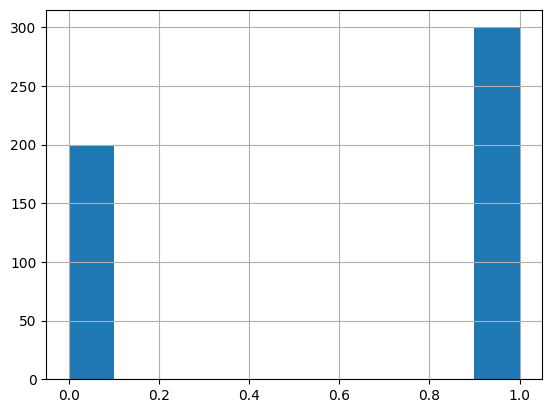

In [11]:
data = pd.read_csv('Heart Prediction Quantum Dataset.csv')
data = data.drop('QuantumPatternFeature',axis=1)
print(data)
data['HeartDisease'].hist()

In [12]:
X = data
target = data['HeartDisease']
target
X.describe()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,HeartDisease
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,54.864000,0.468000,132.874000,221.50000,88.766000,0.600000
std,14.315004,0.499475,26.418516,43.86363,17.417289,0.490389
min,30.000000,0.000000,90.000000,150.00000,60.000000,0.000000
25%,43.000000,0.000000,111.000000,183.75000,73.000000,0.000000
50%,55.000000,0.000000,132.000000,221.00000,89.000000,1.000000
75%,66.250000,1.000000,155.000000,258.00000,104.000000,1.000000
max,79.000000,1.000000,179.000000,299.00000,119.000000,1.000000


In [13]:
n = [i for i in range(1,15)]
p = [1,2]


scores = {}

for n_value in n:
    for p_value in p:
        knn = KNeighborsClassifier(n_neighbors=n_value, p=p_value)
        score = cross_val_score(knn, X, target, cv=StratifiedKFold(5))
        score = score.mean()
        print(f'n={n_value} p={p_value} score={score * 100:.2f}%')
        scores[f'n={n_value} p={p_value}'] = score

n=1 p=1 score=69.80%
n=1 p=2 score=68.60%
n=2 p=1 score=67.40%
n=2 p=2 score=64.60%
n=3 p=1 score=74.40%
n=3 p=2 score=71.80%
n=4 p=1 score=73.20%
n=4 p=2 score=68.60%
n=5 p=1 score=74.80%
n=5 p=2 score=71.80%
n=6 p=1 score=73.20%
n=6 p=2 score=70.60%
n=7 p=1 score=73.20%
n=7 p=2 score=72.20%
n=8 p=1 score=73.80%
n=8 p=2 score=71.20%
n=9 p=1 score=74.80%
n=9 p=2 score=73.40%
n=10 p=1 score=74.40%
n=10 p=2 score=74.20%
n=11 p=1 score=75.20%
n=11 p=2 score=75.60%
n=12 p=1 score=75.20%
n=12 p=2 score=73.80%
n=13 p=1 score=75.20%
n=13 p=2 score=75.00%
n=14 p=1 score=76.00%
n=14 p=2 score=73.60%


In [20]:
import matplotlib.pyplot as plt
import pickle
import base64
import io

n_values = range(1,15)
scores_p1 = [scores[f'n={n} p=1'] for n in n_values]
scores_p2 = [scores[f'n={n} p=2'] for n in n_values]

plt.figure(figsize=(10,6))
plt.plot(n_values, scores_p1, label='p=1 (Manhattan)', marker='o', color='blue')
plt.plot(n_values, scores_p2, label='p=2 (Euklidesowa)', marker='o', color='green')

plt.title('Dokladnosc KNN w zalenosci od liczby sasiadow')
plt.xlabel('Liczba sasiadow')
plt.ylabel('Dokladnosc')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)

img_base64 = base64.b64encode(buf.read()).decode('utf-8')

plt.close()

with open('../datasets/knn-heart.pkl', 'wb') as f:
    pickle.dump(img_base64, f)

plt.show()
